In [85]:
# Importing all necessary libraries
%load_ext autoreload
%autoreload 2

# internal packages
import os
from collections import Counter, OrderedDict

# external packages
import torch
import torchvision
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt

# util functions
from main.util import *

# dataset functions
from dataset import load_util

# autoencoder
from models.autoencoder.conv_ae import ConvAE
from models.simclr.simclr import *
from models.simclr.transforms import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
print("Versions:")
print(f"torch: {torch.__version__}")
print(f"torchvision: {torchvision.__version__}")
print(f"numpy: {np.__version__}",)
print(f"scikit-learn: {sklearn.__version__}")

device = detect_device()
print("Using device: ", device)

Versions:
torch: 1.7.1+cu110
torchvision: 0.8.2+cu110
numpy: 1.19.5
scikit-learn: 0.24.1
Using device:  cuda


In [47]:
# specify learning params
batch_size = 64
learning_rate = 1e-3
epochs = 150

# training

train = True

# load datasets and create dataloaders
data, testdata = load_util.load_cifar('./data', download=True, for_model='SimCLR')
data_percent = 0.4

Files already downloaded and verified


### SimCLR Transforms example

In [204]:
t = SimCLRTransforms()

In [205]:
t_pic = []
for i in range(10):
    pic = torch.from_numpy(np.transpose(data.data[i], (2,0,1)))
    t_pic += [pic] + list(t(pic))

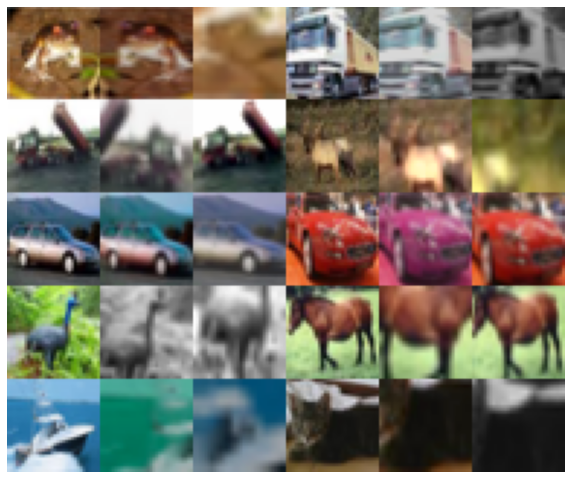

In [206]:
plot_images(t_pic, nrow=6)

In [145]:
from dataset.custom_cifar import CustomCifar

In [199]:
cc = CustomCifar('./data', download=True, for_model='SimCLR', data_percent=0.4)

Files already downloaded and verified


In [200]:
type(cc.classes)

list

In [203]:
cc.__getitem__(6020)

((tensor([[[0.2980, 0.2980, 0.2980,  ..., 0.2610, 0.2884, 0.3020],
           [0.3029, 0.3029, 0.3044,  ..., 0.2898, 0.3056, 0.3093],
           [0.3059, 0.3059, 0.3078,  ..., 0.3130, 0.3187, 0.3181],
           ...,
           [0.4985, 0.5212, 0.5642,  ..., 0.4039, 0.3958, 0.3868],
           [0.4912, 0.4926, 0.5197,  ..., 0.4133, 0.4011, 0.3912],
           [0.4863, 0.4749, 0.4934,  ..., 0.4250, 0.4074, 0.3961]],
  
          [[0.2706, 0.2706, 0.2706,  ..., 0.2437, 0.2654, 0.2745],
           [0.2730, 0.2745, 0.2769,  ..., 0.2691, 0.2799, 0.2819],
           [0.2775, 0.2780, 0.2799,  ..., 0.2885, 0.2906, 0.2892],
           ...,
           [0.4765, 0.5099, 0.5647,  ..., 0.3853, 0.3787, 0.3711],
           [0.4662, 0.4741, 0.5099,  ..., 0.3947, 0.3834, 0.3740],
           [0.4588, 0.4498, 0.4746,  ..., 0.4081, 0.3901, 0.3765]],
  
          [[0.2392, 0.2392, 0.2392,  ..., 0.2268, 0.2481, 0.2549],
           [0.2441, 0.2441, 0.2456,  ..., 0.2515, 0.2615, 0.2598],
           [0.2485, 0.